Importing Libraries


In [38]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Backtester for a Moving Average Strategy

This backtester evaluates a **moving average crossover strategy on single stock** using Tesla's historical stock prices. The strategy involves comparing the stock's daily closing price with its 10-day simple moving average (SMA). If the price exceeds the SMA, a buy signal is generated, and returns are calculated based on daily percentage changes.

The backtester simulates the strategy's performance by:
1. Calculating the **daily market returns** and strategy returns (when in position based on the previous day's signal).
2. Computing the **cumulative returns** for both the strategy and the market (buy-and-hold).

The results include:
- A plot comparing the stock's price and the 10-day SMA, with buy signals highlighted.
- A graph comparing the cumulative performance of the strategy against the market.

This approach visualizes the effectiveness of the strategy in capturing trends and outpacing the market.

In [39]:
# Download the data
data = yf.download("TSLA", start="2024-01-01", end="2024-11-10")

# Keep only the column 'Close'
data = data[['Close']]

# Calculating the mobile 10 days average
data['SMA_10'] = data['Close'].rolling(window=10).mean()

# Delete lines with Nan
data = data[data['SMA_10'].notnull()]

# Delete MultiIndex 
if isinstance(data.columns, pd.MultiIndex):
    data.columns = ['_'.join(filter(None, col)) for col in data.columns]
    
# Create a csv file with the data
data.to_csv('stockdataTSLA.csv')

# Creating a datafram with the date in indexand two columns: Close and SAM_10
data=pd.read_csv('stockDataTSLA.csv', index_col='Date', parse_dates=True)

# Creating 'Signal' column
data['Signal']=(data['Close_TSLA']>data['SMA_10']).astype(int)

# Daily return column = (close_t - close_(t-1))/close_(t-1)
data['Daily_Returns'] = data['Close_TSLA'].pct_change()

# Daily of our strategy: if Signal = 1, we buy, else we don't
data['Strategy_Returns']=data['Daily_Returns']*data['Signal'].shift(1) 

# Cumulative strategy returns = (1+Strategy_Returnes).cumprod()
data['Cumulative_Strategy_Returns']=(1+data['Strategy_Returns']).cumprod()

# Cumulative Market Return: return of we had bought and keep the money
data['Cumulative_Market_Returns'] = (1 + data['Daily_Returns']).cumprod() 





[*********************100%***********************]  1 of 1 completed

In [40]:
# Creating a datafram with the date in index and two columns: Close and SAM_10
data=pd.read_csv('stockDataTSLA.csv', index_col='Date', parse_dates=True)


data.head()

,Close_TSLA,SMA_10
Date,,
2024-01-16 00:00:00+00:00,219.910004,233.766000
2024-01-17 00:00:00+00:00,215.550003,230.479001
2024-01-18 00:00:00+00:00,211.880005,227.822002
2024-01-19 00:00:00+00:00,212.190002,225.248003
2024-01-22 00:00:00+00:00,208.800003,222.379002


In [41]:
# Creating 'Signal' column
data['Signal']=(data['Close_TSLA']>data['SMA_10']).astype(int)

# Daily return column =(close_t - close_(t-1))/close_(t-1)
data['Daily_Returns'] = data['Close_TSLA'].pct_change()

# Daily of our strategy : if Signal = 1, we buy, else we don't
data['Strategy_Returns']=data['Daily_Returns']*data['Signal'].shift(1) 

# Cumulative strategy returns = (1+Strategy_Returnes).cumprod()
data['Cumulative_Strategy_Returns']=(1+data['Strategy_Returns']).cumprod()

# Cumulative Market Return: return of we had bought and keep the money
data['Cumulative_Market_Returns'] = (1 + data['Daily_Returns']).cumprod() 

data.head()

,Close_TSLA,SMA_10,Signal,Daily_Returns,Strategy_Returns,Cumulative_Strategy_Returns,Cumulative_Market_Returns
Date,,,,,,,
2024-01-16 00:00:00+00:00,219.910004,233.766000,0,NaN,NaN,NaN,NaN
2024-01-17 00:00:00+00:00,215.550003,230.479001,0,-0.019826,-0.0,1.0,0.980174
2024-01-18 00:00:00+00:00,211.880005,227.822002,0,-0.017026,-0.0,1.0,0.963485
2024-01-19 00:00:00+00:00,212.190002,225.248003,0,0.001463,0.0,1.0,0.964895
2024-01-22 00:00:00+00:00,208.800003,222.379002,0,-0.015976,-0.0,1.0,0.949479


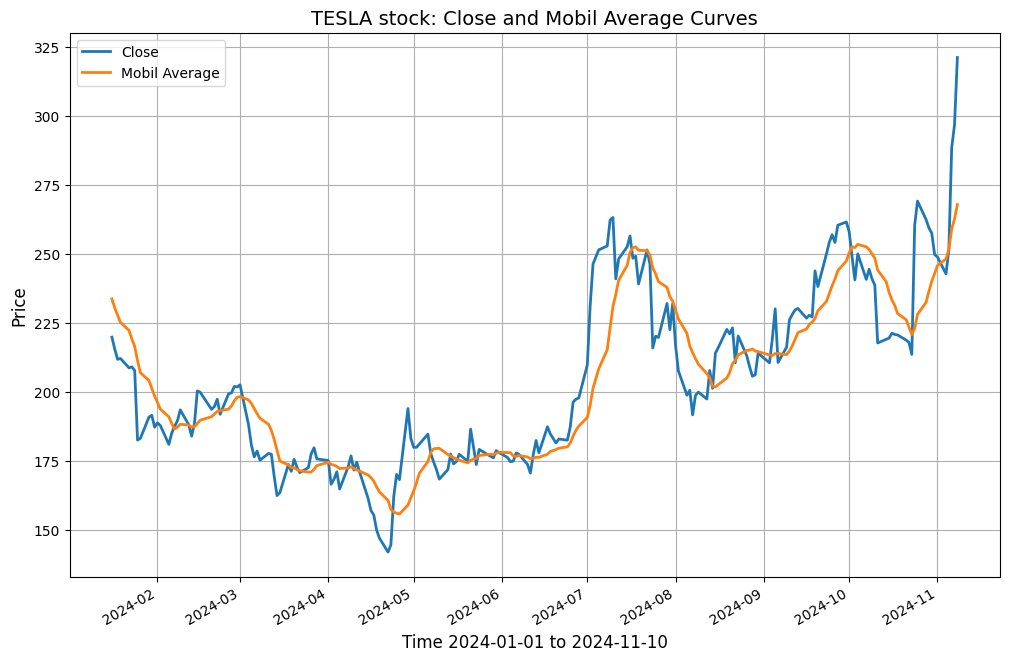

In [42]:

# Plot the curve of the mobil average and the closing price

plt.figure (figsize=(12,8))

data['Close_TSLA'].plot(label='Close', linewidth =2)
data['SMA_10'].plot(label='Mobil Average', linewidth =2)

# Add labels and legend
plt.title("TESLA stock: Close and Mobil Average Curves", fontsize=14)
plt.xlabel("Time 2024-01-01 to 2024-11-10", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()

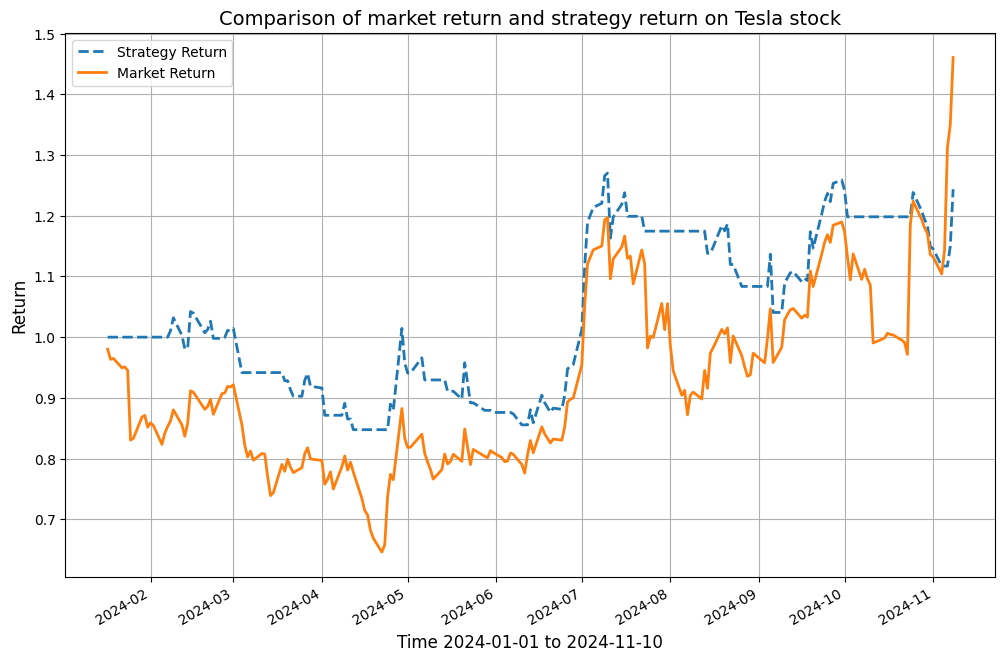

In [43]:

# Plot the curve ot the cumulative return of the market and of the mobil average strategy 

plt.figure (figsize=(12,8))

data['Cumulative_Strategy_Returns'].plot(label='Strategy Return', linestyle='--', linewidth=2)
data['Cumulative_Market_Returns'].plot(label='Market Return', linestyle='-', linewidth=2)

# Add labels and legend
plt.title("Comparison of market return and strategy return on Tesla stock", fontsize=14)
plt.xlabel("Time 2024-01-01 to 2024-11-10", fontsize=12)
plt.ylabel("Return", fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

plt.show()




In [44]:
# Creating csv file
data.to_csv('stockDataTSLA.csv')
